In [1]:
import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *

In [2]:
bs=16

In [3]:
path = Path(os.path.join(os.getcwd()))

In [4]:
path_train = path/'train'
path_valid = path/'valid'

In [5]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (24 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
cat_322,cat_322,cat_322,cat_322,cat_322
Path: /Users/patrickcullinane/Documents/Code/small datasets/exc_classifier;

Valid: LabelList (6 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
cat_322,cat_322,cat_322,pc78,pc78
Path: /Users/patrickcullinane/Documents/Code/small datasets/exc_classifier;

Test: None

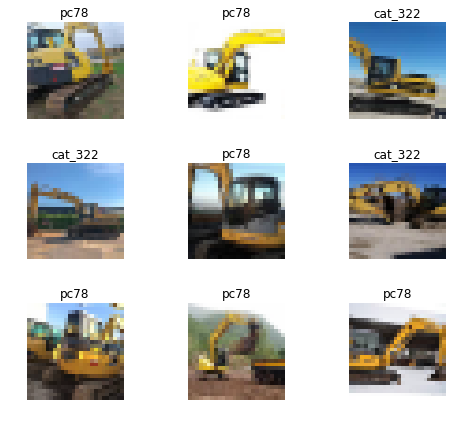

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)
len(data.classes),data.c

['cat_322', 'pc78']


(2, 2)

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.737546,0.858709,0.500000
2,0.725238,0.794875,0.500000
3,0.649717,0.740334,0.500000
4,0.720382,0.665963,0.333333
5,0.725711,0.644979,0.333333
6,0.682020,0.585168,0.333333
7,0.687984,0.546973,0.333333
8,0.770047,0.560612,0.333333
9,0.754867,0.550686,0.333333
10,0.729697,0.550144,0.333333


In [10]:
learn.save('stage-1') # saving the model weights


In [1]:
#learn.load('stage-1') # loading the model weights

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

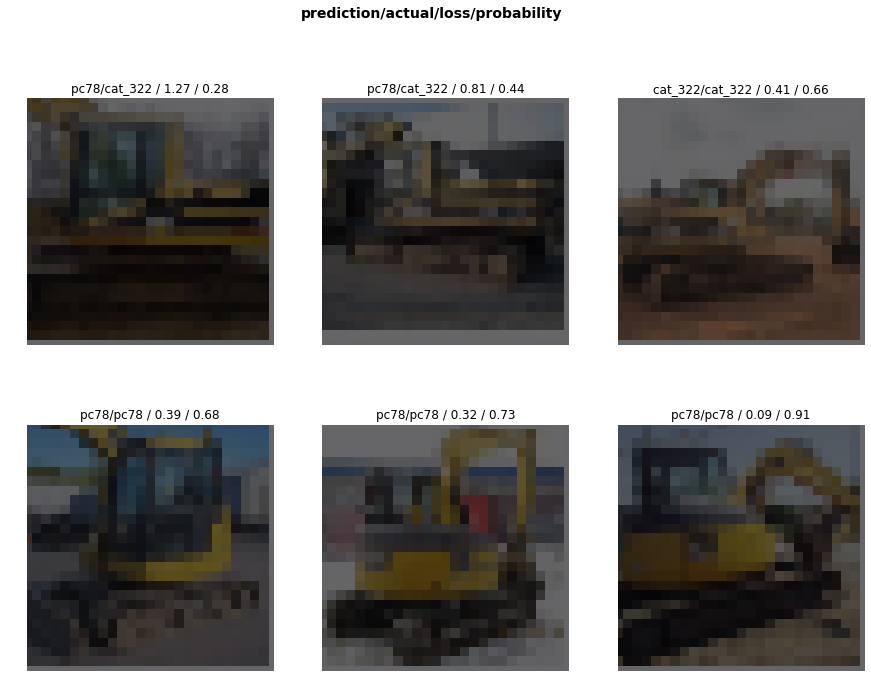

In [13]:
interp.plot_top_losses(6, figsize=(15,11))

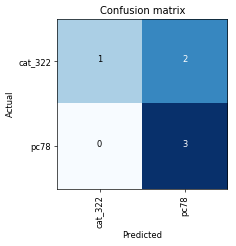

In [14]:
interp.plot_confusion_matrix(dpi=60)

In [16]:
interp.most_confused(min_val=2)

[]

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.699689,0.605296,0.333333


In [19]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (24 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
cat_322,cat_322,cat_322,cat_322,cat_322
Path: /Users/patrickcullinane/Documents/Code/small datasets/exc_classifier;

Valid: LabelList (6 items)
x: ImageItemList
Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26),Image (3, 26, 26)
y: CategoryList
cat_322,cat_322,cat_322,pc78,pc78
Path: /Users/patrickcullinane/Documents/Code/small datasets/exc_classifier;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1),

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06


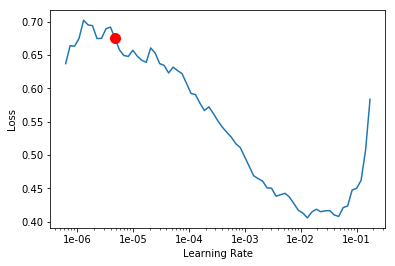

In [22]:
learn.recorder.plot()

In [24]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-02,1e-01))

epoch,train_loss,valid_loss,error_rate
1,3.789475,2169416.250000,0.500000
2,2.366141,3004361472.000000,0.500000
